In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Đọc dữ liệu 

In [97]:
data=pd.read_csv('./iris/iris.data',names=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class' ])
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2) Thống kê số lượng nhãn, số lượng thuộc tính và phân bố dữ liệu theo nhãn.

In [98]:
print('Số lượng nhãn',data['class'].nunique())
print('Nhãn:',data['class'].unique())

Số lượng nhãn 3
Nhãn: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [99]:
print('Số lượng thuộc tính',data.shape[1])
print('Thống kê dữ liệu:')
data.describe()

Số lượng thuộc tính 5
Thống kê dữ liệu:


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [100]:
print('Phân bố dữ liệu theo nhãn')
(data['class'].value_counts()/data.shape[0]*100).to_frame().T

Phân bố dữ liệu theo nhãn


class,Iris-setosa,Iris-versicolor,Iris-virginica
count,33.333333,33.333333,33.333333


# 3) Chuẩn bị dữ liệu: phân chia dữ liệu ban đầu thành 2 tập: huấn luyện (train) và kiểm thử (test) với tỉ lệ 8-2.

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X=data.drop(['class'],axis=1)
y=data['class']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4) Cài đặt mô hình: kNN và SVM. Sử dụng kỹ thuật cross validation.

**Dùng GridSearchCV để tìm ra tham số tốt nhất cho mô hình**

In [104]:
from sklearn.model_selection  import GridSearchCV

## KNN

In [105]:
from  sklearn.neighbors import KNeighborsClassifier

In [106]:
param_grid_knn = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform', 'distance'],
    
}
knn=KNeighborsClassifier()

In [107]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5,n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [108]:
print('Tham số tốt nhất:',grid_search_knn.best_params_)
print('Độ chính xác trên tập train:',grid_search_knn.best_score_)

Tham số tốt nhất: {'n_neighbors': 3, 'weights': 'uniform'}
Độ chính xác trên tập train: 0.9583333333333334


In [109]:
final_knn_model=grid_search_knn.best_estimator_

## SVM

In [110]:
from  sklearn.svm import SVC

In [111]:
param_grid_svm = {
    'C': [0.1,1, 10,100],
    'gamma': [1,0.1,0.01, 0.001]
}
svm_model=SVC()

In [112]:
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5,n_jobs=-1,)
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [113]:
print('Tham số tốt nhất:',grid_search_svm.best_params_)
print('Độ chính xác trên tập train:',grid_search_svm.best_score_)

Tham số tốt nhất: {'C': 1, 'gamma': 1}
Độ chính xác trên tập train: 0.9583333333333334


In [114]:
final_svm_model=grid_search_svm.best_estimator_

# 5) Đánh giá mô hình: Độ chính xác (Accuracy) Ma trận nhầm lẫn (Confusion matrix).

In [115]:
from sklearn.metrics import accuracy_score,confusion_matrix

## KNN

accuracy_score KNN: 1.0
confusion_matrix KNN:


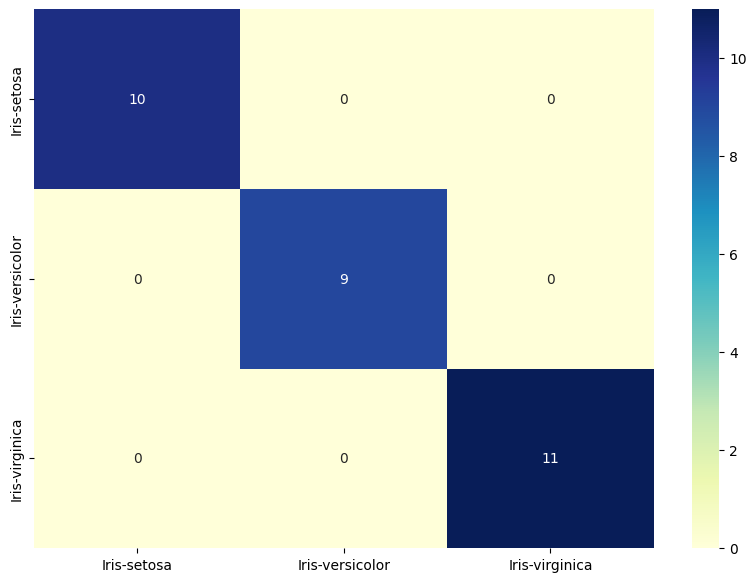

In [116]:
y_pred_knn=final_knn_model.predict(X_test)
print('accuracy_score KNN:',accuracy_score(y_test,y_pred_knn))
print('confusion_matrix KNN:')
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,fmt='d',cmap='YlGnBu',xticklabels=final_knn_model.classes_,yticklabels=final_knn_model.classes_)
plt.show()

## SVM

accuracy_score SVM: 1.0
confusion_matrix SVM:


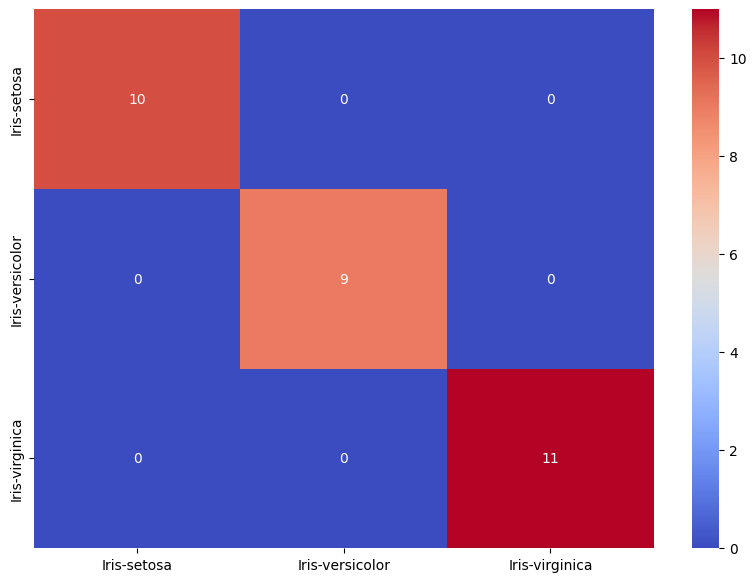

In [117]:
y_pred_svm=final_svm_model.predict(X_test)
print('accuracy_score SVM:',accuracy_score(y_test,y_pred_svm))
print('confusion_matrix SVM:')
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True,fmt='d',cmap='coolwarm',xticklabels=final_svm_model.classes_,yticklabels=final_svm_model.classes_)
plt.show()

## 6) Có nhận xét gì về hiệu quả giữa 2 mô hình?

**Cả 2 mô hình đều cho kết quả tuyệt đối.Điều này cũng dễ hiểu vì số lượng record ít,không gian ít,lớp dữ liệu cũng không nhiều nên những mô hình này đều có thể dễ dàng cho ra kết quả tuyệt đối trên tập test vì 20% của toàn bộ dữ liệu iris chỉ vỏn ven 30 dòng.**

# 7) Cài đặt thêm 2 thuật toán: Linear Discriminant Analysis (LDA) và Random Forest (RF). So sánh kết quả giữa 4 mô hình với nhau.

## LDA

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [119]:
param_grid_lda = {
    'solver': ['svd', 'lsqr']
}
lda_model=LinearDiscriminantAnalysis()

In [120]:
grid_search_lda = GridSearchCV(lda_model, param_grid_lda, cv=15,n_jobs=-1)
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr']})

In [121]:
print('Tham số tốt nhất:',grid_search_lda.best_params_)
print('Độ chính xác trên tập train:',grid_search_lda.best_score_)

Tham số tốt nhất: {'solver': 'svd'}
Độ chính xác trên tập train: 0.975


In [122]:
final_lda_model=grid_search_lda.best_estimator_

accuracy_score LDA: 1.0
confusion_matrix LDA:


<Axes: >

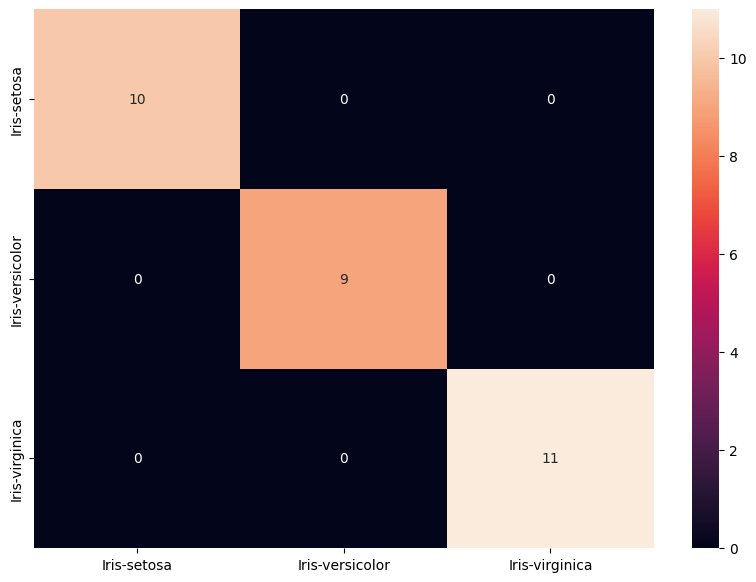

In [123]:
y_pred_lda=final_lda_model.predict(X_test)
print('accuracy_score LDA:',accuracy_score(y_test,y_pred_lda))
print('confusion_matrix LDA:')
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred_lda),annot=True,fmt='d',xticklabels=final_lda_model.classes_,yticklabels=final_lda_model.classes_)

## RF

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
param_grid_rf = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3],
}
rf_model=RandomForestClassifier()

In [126]:
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5,n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3]})

In [127]:
print('Tham số tốt nhất:',grid_search_rf.best_params_)
print('Độ chính xác trên tập train:',grid_search_rf.best_score_)

Tham số tốt nhất: {'criterion': 'gini', 'max_depth': 3}
Độ chính xác trên tập train: 0.95


accuracy_score Random Forest: 1.0
confusion_matrix Random Forest:


<Axes: >

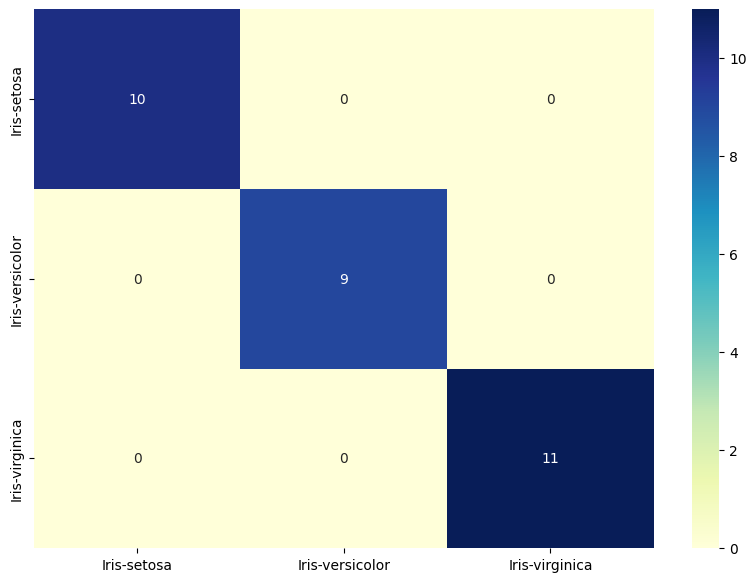

In [128]:
final_rf_model=grid_search_rf.best_estimator_
y_pred_rf=final_rf_model.predict(X_test)
print('accuracy_score Random Forest:',accuracy_score(y_test,y_pred_rf))
print('confusion_matrix Random Forest:')
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='d',cmap='YlGnBu',xticklabels=final_rf_model.classes_,yticklabels=final_rf_model.classes_)

## So sánh kết quả 4 mô hình

In [129]:
print('Độ chính xác của các mô hình giảm dần từ trái sang phải:')
y_preds=[y_pred_knn,y_pred_svm,y_pred_lda,y_pred_rf]
models=['KNN','SVM','LDA','Random Forest']
pd.Series([accuracy_score(y_test,y_pred) for y_pred in y_preds],index=models).sort_values(ascending=False).to_frame().T

Độ chính xác của các mô hình giảm dần từ trái sang phải:


,KNN,SVM,LDA,Random Forest
0,1.0,1.0,1.0,1.0
